# Titanic Dataset: Exploratory Analysis
In this notebook, we're going to analyse the famouse Titanic datasets from kaggle. Although this dataset is meant for supervised machine learning, we're just gonna do some exploratory analysis at this stage.

We will try to answer this following question
* Who were the passengers of the Titanic? (age, gender, class..etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?
* What factors helped someone survived the sinking?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('titanic.csv')

In [2]:
#looking at first rows of the datasets
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from above, we see that a lot of dataset is missing in column 'Cabin' so we need deal with this when we work with cabil column
other columns seem to complete except some 'Age' entries

In [4]:
#looking some more information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


looking at the table, we see only ~38% of the passengers were able to survive.

# Who were the passengers?

let's take a look at some demographical information about passengers

Text(0.5, 0, 'Sex')

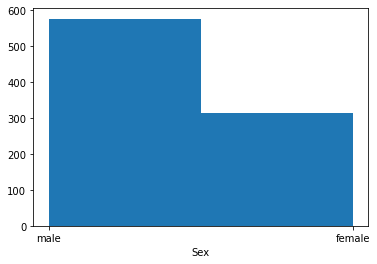

In [5]:
#creationg a histogram chart for male vs female passengers
plt.hist(df.Sex, bins = 2)
plt.xlabel('Sex')

There were considerably more male passengers than female passengers
Let's see how they divided based on different classes

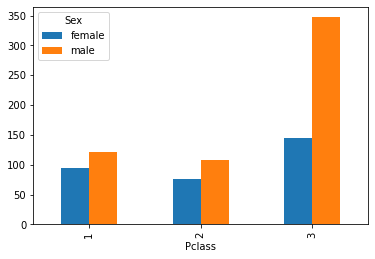

In [6]:
pd.crosstab(df['Pclass'],df['Sex']).plot(kind='bar')

We can divide into male, female and children

In [7]:
#function that will detect if the passenger is a male, female or children
def gender_detector(x):
    if x['Age'] < 16:
        return 'child'
    return x['Sex']
#using pandas apply method to use the gender detector function
df['Person'] = df.apply(gender_detector, axis=1)

In [8]:
#checking if detecor function worked
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


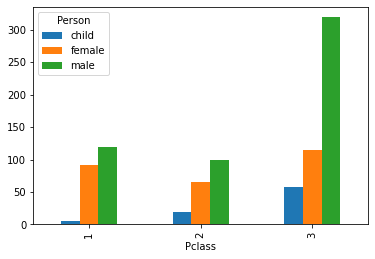

In [9]:
pd.crosstab(df['Pclass'], df['Person']).plot(kind='bar')

We can see there way more male passengers than female or children in 3rd class
let's creak a histogram to see passenger distribution of different ages

/home/versu/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/versu/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

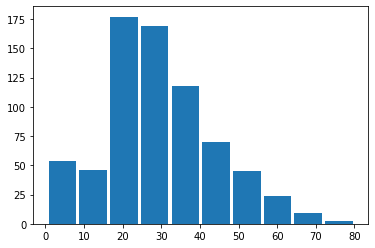

In [10]:
#creating a histogram chart age vs frequency
plt.hist(df.Age, bins= 10, rwidth= .9)

let's see how age distribution varies for different classes.


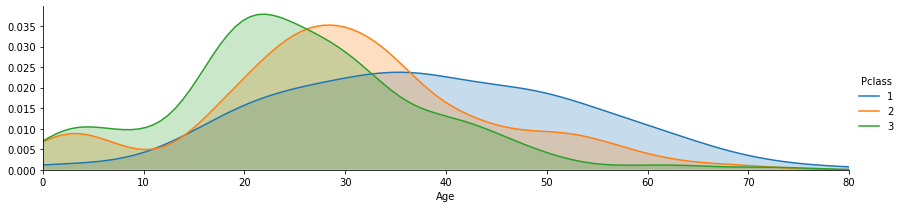

In [11]:
import seaborn as sns
fig = sns.FacetGrid(df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
fig.set(xlim=(0,df.Age.max()))
fig.add_legend()

Clearly We can see, First class belonged more to the group of middle aged people with few children, second and third class have less older passenger with relatively much children

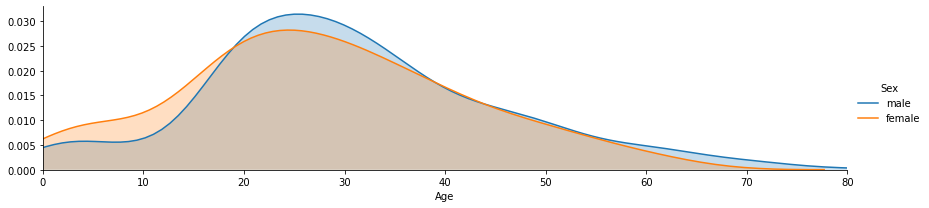

In [12]:
fig = sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
fig.set(xlim=(0,df.Age.max()))
fig.add_legend()

Age distribution seems to be less varried for male and female passenger.Yet we can say there were more younger females than younger males

# What desk were the passengers on and how does that relate to their classes?
Here 'Cabin' column is the combination of desk level and room number. Such as if someone's cabin number is CXXX, then C is his desk level and XXX is his room number.
Now we have define a function to separate desk level from their cabin number.
we saw there are a lot missing data in this column so we just drop these column in this case

In [13]:
droped_cabin = df.dropna(axis=0)
def sep_desk(x):
    return list(x.strip())[0]
droped_cabin['level'] = droped_cabin.Cabin.apply(sep_desk)

<ipython-input-13-cc588f0cd544>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_cabin['level'] = droped_cabin.Cabin.apply(sep_desk)


/home/versu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


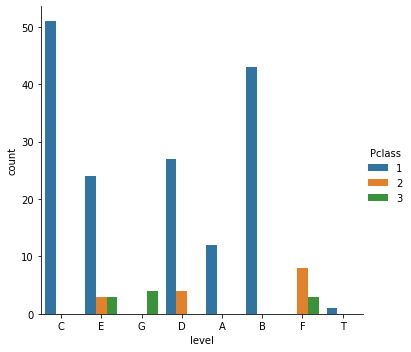

In [14]:
sns.factorplot('level',data= droped_cabin, hue='Pclass',kind='count')

It seems like passengers from the upper classes are indeed assigned to the upper decks. Decks A,B and C were only assigned to the 1st class passengers. We start seeing third class passengers from deck E. Although We have to keep in mind that a lot data were missing.

# Where did the passengers come from?
the columns refers where the passenger was from (C = Cherbourg; Q = Queenstown; S = Southampton)

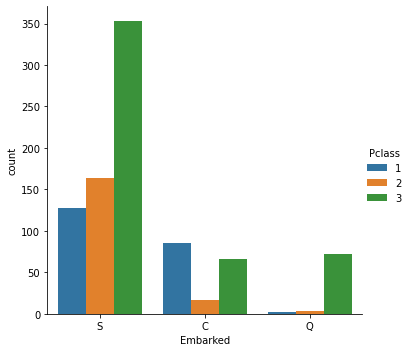

In [18]:
sns.factorplot('Embarked',data = df,hue='Pclass', kind='count')

You can see most of the passengers were from Southampton including jack and Rose from the Titanic Movie. Also we can see there were hardly 1st and 2nd class passengers from Queenstown which gives an idea of their socio-economic status then.

# Who was with their family?

Let's take another look at our data

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


You see the atribute Sipsp and Parch? Sipsp refers the number of siblings or spouse they had onboard and Parch refers the number of parents or children someone had onboard.

As we are just trying to know if a passenger had anyone onboard so we could just add another column combing these simsp and parch.

In [20]:
def alone (x):
    sp = x['SibSp'] 
    pr = x['Parch']
    family=  sp + pr
    if family > 0:
        return 'No'
    return 'Yes'
df['Alone'] = df.apply(alone, axis=1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


Now we'll see if having any family had any impact their surviving chance.

/home/versu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


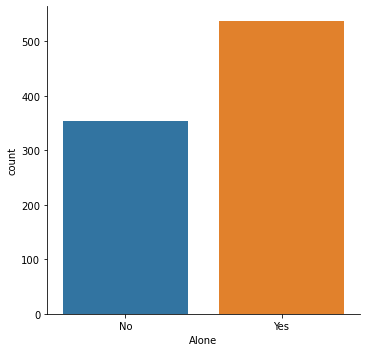

In [23]:
sns.factorplot('Alone',data=df, kind='count')

we see majortiy of the passengers had family onboard. but did it make any difference in their chances of survival?
We'll answer the question in the next section.

# What factor helped someone survive the sinking?


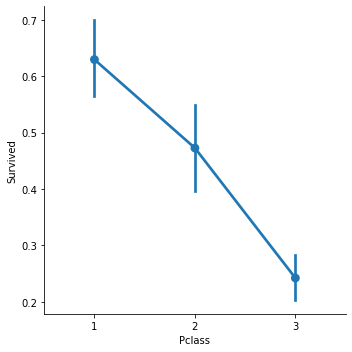

In [27]:
sns.factorplot('Pclass','Survived', data=df)

It seems like lower class passengers had a lower chance of survival.

From the movie, we saw 'Women and Children first' Protocol that ship's administration followed while putting passengers on the lifeboats.
let's see if this was true

/home/versu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


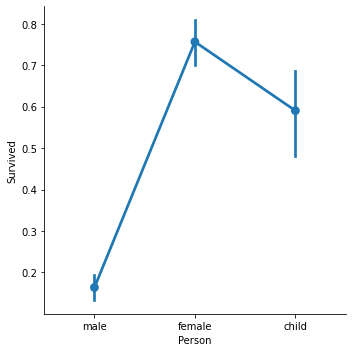

In [28]:
sns.factorplot('Person', 'Survived',data=df)

Mad had lower chance of survival than women and children as they had lower priority of being saved. let's draw another chart to see how class distribution worked in this.

/home/versu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


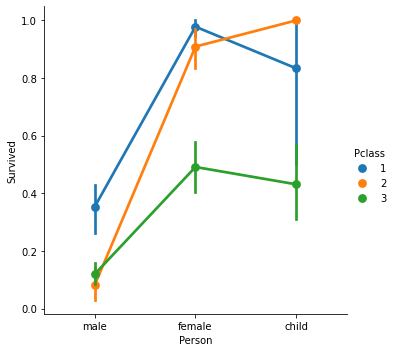

In [29]:
sns.factorplot('Person','Survived',hue='Pclass', data=df)

we see men from third class and second class had lesser chance than men from 1st class
Let's see if there were any relation between Age and Survival

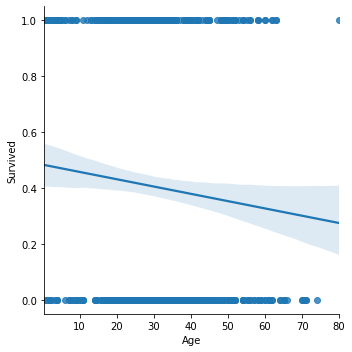

In [31]:
sns.lmplot('Age','Survived', data=df)

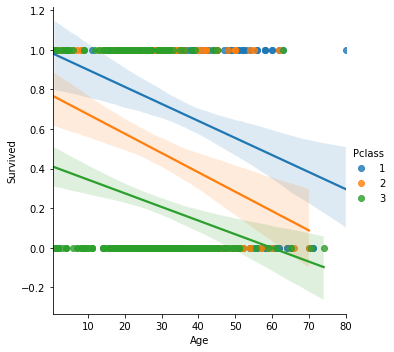

In [32]:
sns.lmplot('Age', 'Survived',hue='Pclass', data=df)

the general concensus from the above two figures seems to be that older were less likely to survive

/home/versu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


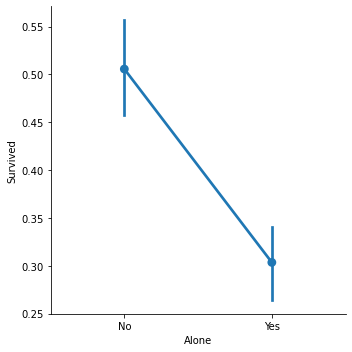

In [34]:
sns.factorplot('Alone','Survived',data=df)

It's not surprising that if someone had anyone on the board , they surely had a higher chance of survival. Company is always goog.